# Northwind Data Visualization

This notebook visualizes the data extracted from the Northwind database, including a 3D analysis of orders.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Ensure figures dir exists
os.makedirs("../figures", exist_ok=True)

In [2]:
# Load the warehouse data
data_path = "../data/warehouse/merged_northwind.csv"
if not os.path.exists(data_path):
    print(f"File not found: {data_path}. Please run the ETL scripts first.")
else:
    df = pd.read_csv(data_path)
    df['FullDate'] = pd.to_datetime(df['FullDate'])
    print("Data loaded successfully.")
    print(df.head())

Data loaded successfully.
   OrderId  CustomerId  EmployeeId    DateId  DeliveredFlag CompanyName  \
0       30          27           9  20060115              1  Company AA   
1       31           4           3  20060120              1   Company D   
2       32          12           4  20060122              1   Company L   
3       33           8           6  20060130              1   Company H   
4       34           4           9  20060206              1   Company D   

      City_x Country_x FirstName        LastName    City_y Country_y  \
0  Las Vegas       USA      Anne  Hellung-Larsen   Seattle       USA   
1   New York       USA       Jan           Kotas   Redmond       USA   
2  Las Vegas       USA    Mariya       Sergienko  Kirkland       USA   
3   Portland       USA   Michael         Neipper   Redmond       USA   
4   New York       USA      Anne  Hellung-Larsen   Seattle       USA   

    FullDate  Day  Month MonthName  
0 2006-01-15   15      1   January  
1 2006-01-20   2

## 1. Orders by Country

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5104\3981259082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_orders, x='Country', y='OrderCount', palette='viridis')


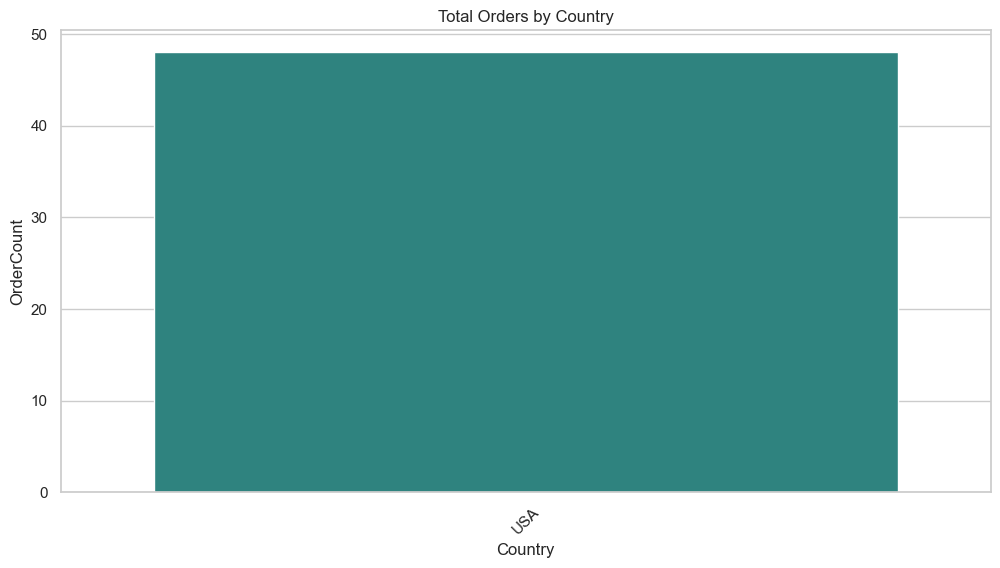

In [3]:
if 'df' in locals():
    # Group by Country
    country_orders = df['Country_x'].value_counts().reset_index()
    country_orders.columns = ['Country', 'OrderCount']

    plt.figure(figsize=(12, 6))
    sns.barplot(data=country_orders, x='Country', y='OrderCount', palette='viridis')
    plt.title('Total Orders by Country')
    plt.xticks(rotation=45)
    plt.savefig("../figures/orders_by_country.png")
    plt.show()

## 2. Orders by Employee

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5104\1594574012.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employee_orders, x='OrderCount', y='EmployeeName', palette='magma')


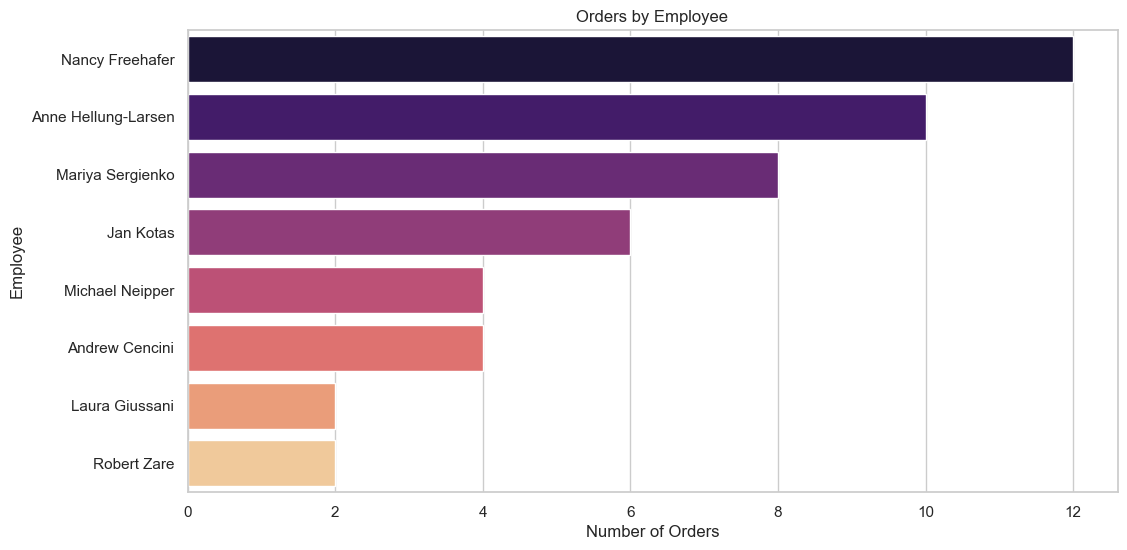

In [4]:
if 'df' in locals():
    # Combine Name
    df['EmployeeName'] = df['FirstName'] + ' ' + df['LastName']
    employee_orders = df['EmployeeName'].value_counts().reset_index()
    employee_orders.columns = ['EmployeeName', 'OrderCount']

    plt.figure(figsize=(12, 6))
    sns.barplot(data=employee_orders, x='OrderCount', y='EmployeeName', palette='magma')
    plt.title('Orders by Employee')
    plt.xlabel('Number of Orders')
    plt.ylabel('Employee')
    plt.savefig("../figures/orders_by_employee.png")
    plt.show()

## 3. Orders over Time (Monthly)

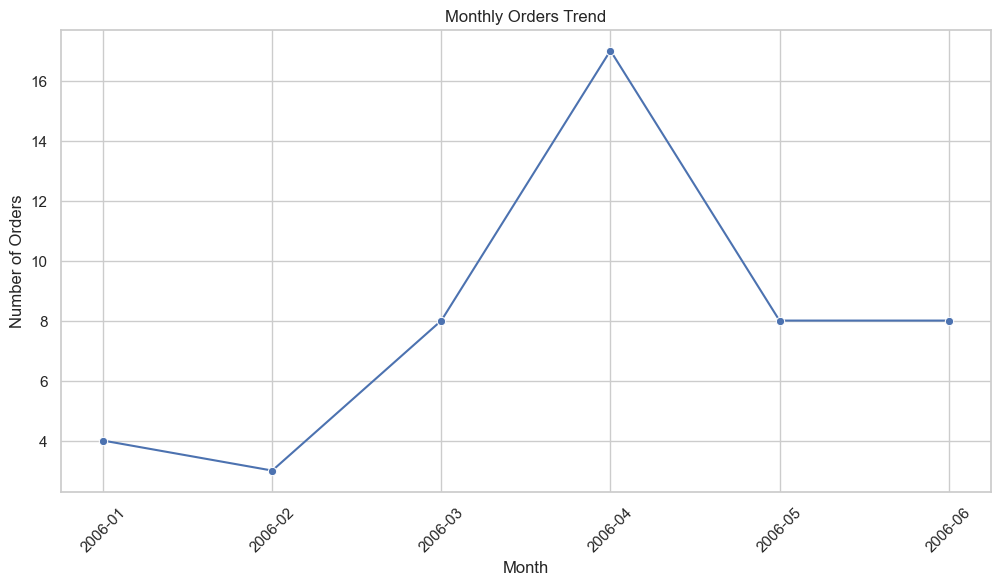

In [5]:
if 'df' in locals():
    # Monthly trend
    df['YearMonth'] = df['FullDate'].dt.to_period('M')
    monthly_orders = df.groupby('YearMonth').size().reset_index(name='OrderCount')
    monthly_orders['YearMonth'] = monthly_orders['YearMonth'].astype(str)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_orders, x='YearMonth', y='OrderCount', marker='o')
    plt.title('Monthly Orders Trend')
    plt.xticks(rotation=45)
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')
    plt.savefig("../figures/monthly_orders_trend.png")
    plt.show()

## 4. 3D Diagram: Orders by Month and Country

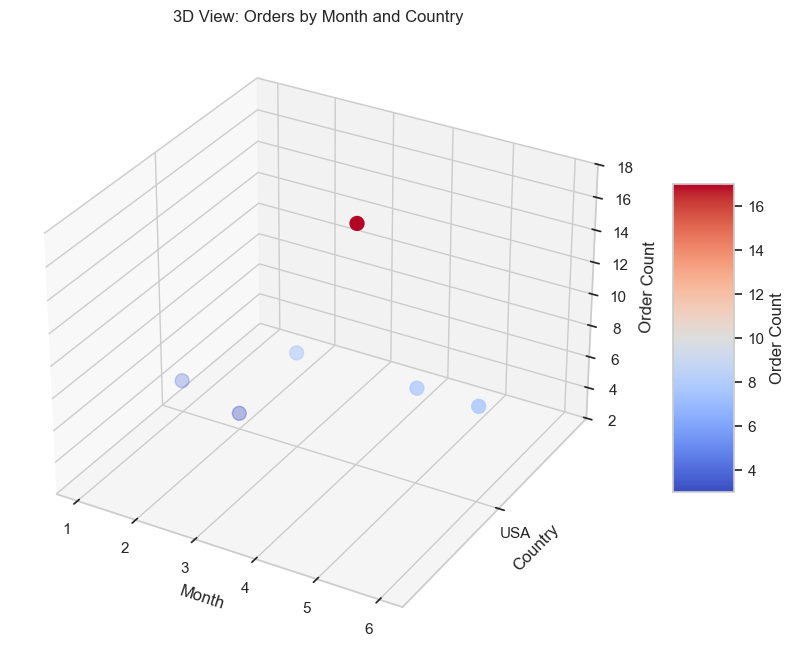

In [6]:
if 'df' in locals():
    df['MonthNum'] = df['FullDate'].dt.month
    agg = df.groupby(['MonthNum', 'Country_x']).size().reset_index(name='OrderCount')
    
    countries = agg['Country_x'].unique()
    country_map = {c: i for i, c in enumerate(countries)}
    agg['CountryId'] = agg['Country_x'].map(country_map)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    p = ax.scatter(
        agg['MonthNum'], 
        agg['CountryId'], 
        agg['OrderCount'], 
        c=agg['OrderCount'], 
        cmap='coolwarm', 
        s=100,
        depthshade=True
    )
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Country')
    ax.set_zlabel('Order Count')
    ax.set_title('3D View: Orders by Month and Country')
    
    ax.set_yticks(range(len(countries)))
    ax.set_yticklabels(countries)
    
    fig.colorbar(p, ax=ax, shrink=0.5, aspect=5, label='Order Count')
    
    plt.savefig("../figures/3d_orders_by_month_country.png")
    plt.show()